# Project 2 - Book 2: Ames Housing Data Analysis

## Problem Statement

Our real estate investment company has newly set up a data science team. The main feedback from the invesmtent team is trouble identifying property with investment value due to the myriad of factors. We are tasked to find out what are strong predictors of housing prices. To do so, we will be examining ames housing data. We hope to be able to predict housing prices and therefore identify highly demanded features by potential homeowner so as to provide recommendations to guide the company's investment strategy.

## Executive Summary

We have been tasked to predict housing prices so as to generate actionable insights for the organisation to achieve larger margins in their investment strategy. In order to achieve our goals, we will be performing data cleaning, feature engineering, EDA, feature selection and lastly several regression models to predict sale prices. Based on an accuracy score, the best model will be evaluated and chosen to predict sale prices. Having mirrored the market, we can then find out which are the strong predictors of sale prices. With this information, the company is able to locate properties with the favoured features and flip them for profit, generating value for the management, shareholders and of course customers. 


## Notebooks:
- [Data Cleaning and Feature Selection](./book1_data_cleaning_feature_engineering.ipynb)
- [EDA and Feature Selection](./book2_eda_feature_selection.ipynb)
- [Preprocessing, Modeling and Recommendations](./book3_preprocesing_modeling_recommendations.ipynb)

## Contents:
- [Import Libraries](#Import-Libraries)
- [Import Data](#Import-Data)
- [More Data Cleaning](#More-Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Selection](#Feature-Selection)
- [Save Data to CSV](#Save-Data-to-CSV)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#display all rows and columns of dataframe
pd.set_option("max_rows", None)
pd.set_option('max_columns', None)

### Import Data

In [3]:
#read data and import into notebook 
ames_train=pd.read_csv('../datasets/train_clean.csv')

In [4]:
ames_train.shape

(2051, 125)

### More Data Cleaning

In [5]:
ames_train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL     87.704386     13517   Pave   
1  544  531379050           60        RL     74.565274     11492   Pave   
2  153  535304180           20        RL     59.793192      7922   Pave   
3  318  916386060           60        RL     73.982942      9802   Pave   
4  255  906425045           50        RL     92.363094     14235   Pave   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4       

In [6]:
#since we have 2 null values, which is a small prportion of the train data, we will drop the rows
ames_train.drop(list(ames_train[ames_train['garage_cars'].isnull()].index),inplace=True)

In [7]:
#check for the types of zoning classification
ames_train['ms_zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [8]:
#find all transactions that are commercial and industrial -> 20 rows
ames_train[(ames_train['ms_zoning']=='C (all)')|(ames_train['ms_zoning']=='I (all)')]
#we will drop these rows as it could affect the residential sale prices
ames_train.drop(list(ames_train[(ames_train['ms_zoning']=='C (all)')|(ames_train['ms_zoning']=='I (all)')].index),axis=0,inplace=True)

In [9]:
#the pid is a unique identifier for every house in ames. I believe that there is a breakdown that
#I could not find which could be used as a proxy for location
#for our current purposes, we will leave it out 
ames_train.drop('pid',axis=1,inplace=True)

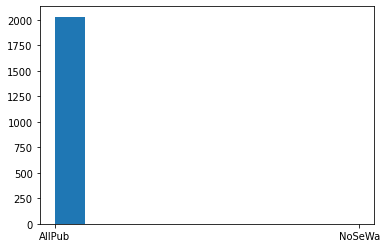

In [10]:
plt.hist(ames_train['utilities']);
#here we can see that almost the whole column is AllPub and probably bears no statistical significanc
#as such, we will drop the utilities column
ames_train.drop('utilities',axis=1,inplace=True)

### Exploratory Data Analysis

#### Distribution of the Target Variable

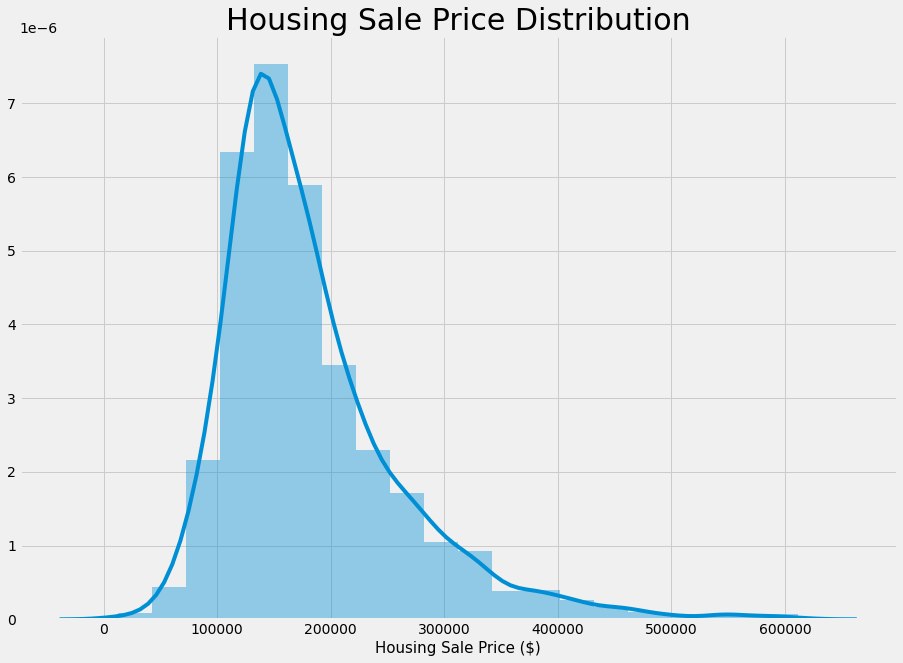

In [11]:
#let's take a look at the distribution of sale price
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,10))
sns.distplot(ames_train['saleprice'],bins=20)
plt.title('Housing Sale Price Distribution',fontsize=30)
plt.xlabel('Housing Sale Price ($)',fontsize=15);

##### Observation of the distribution
The distribution of sale prices is skewed to the right, given the long tail of the curve. The bulk of the houses sold are mainly cheaper homes.  

#### Numerical Variables
Next, let's look at the correlation of our numerical variables

In [12]:
train_original=pd.read_csv('../datasets/train.csv')

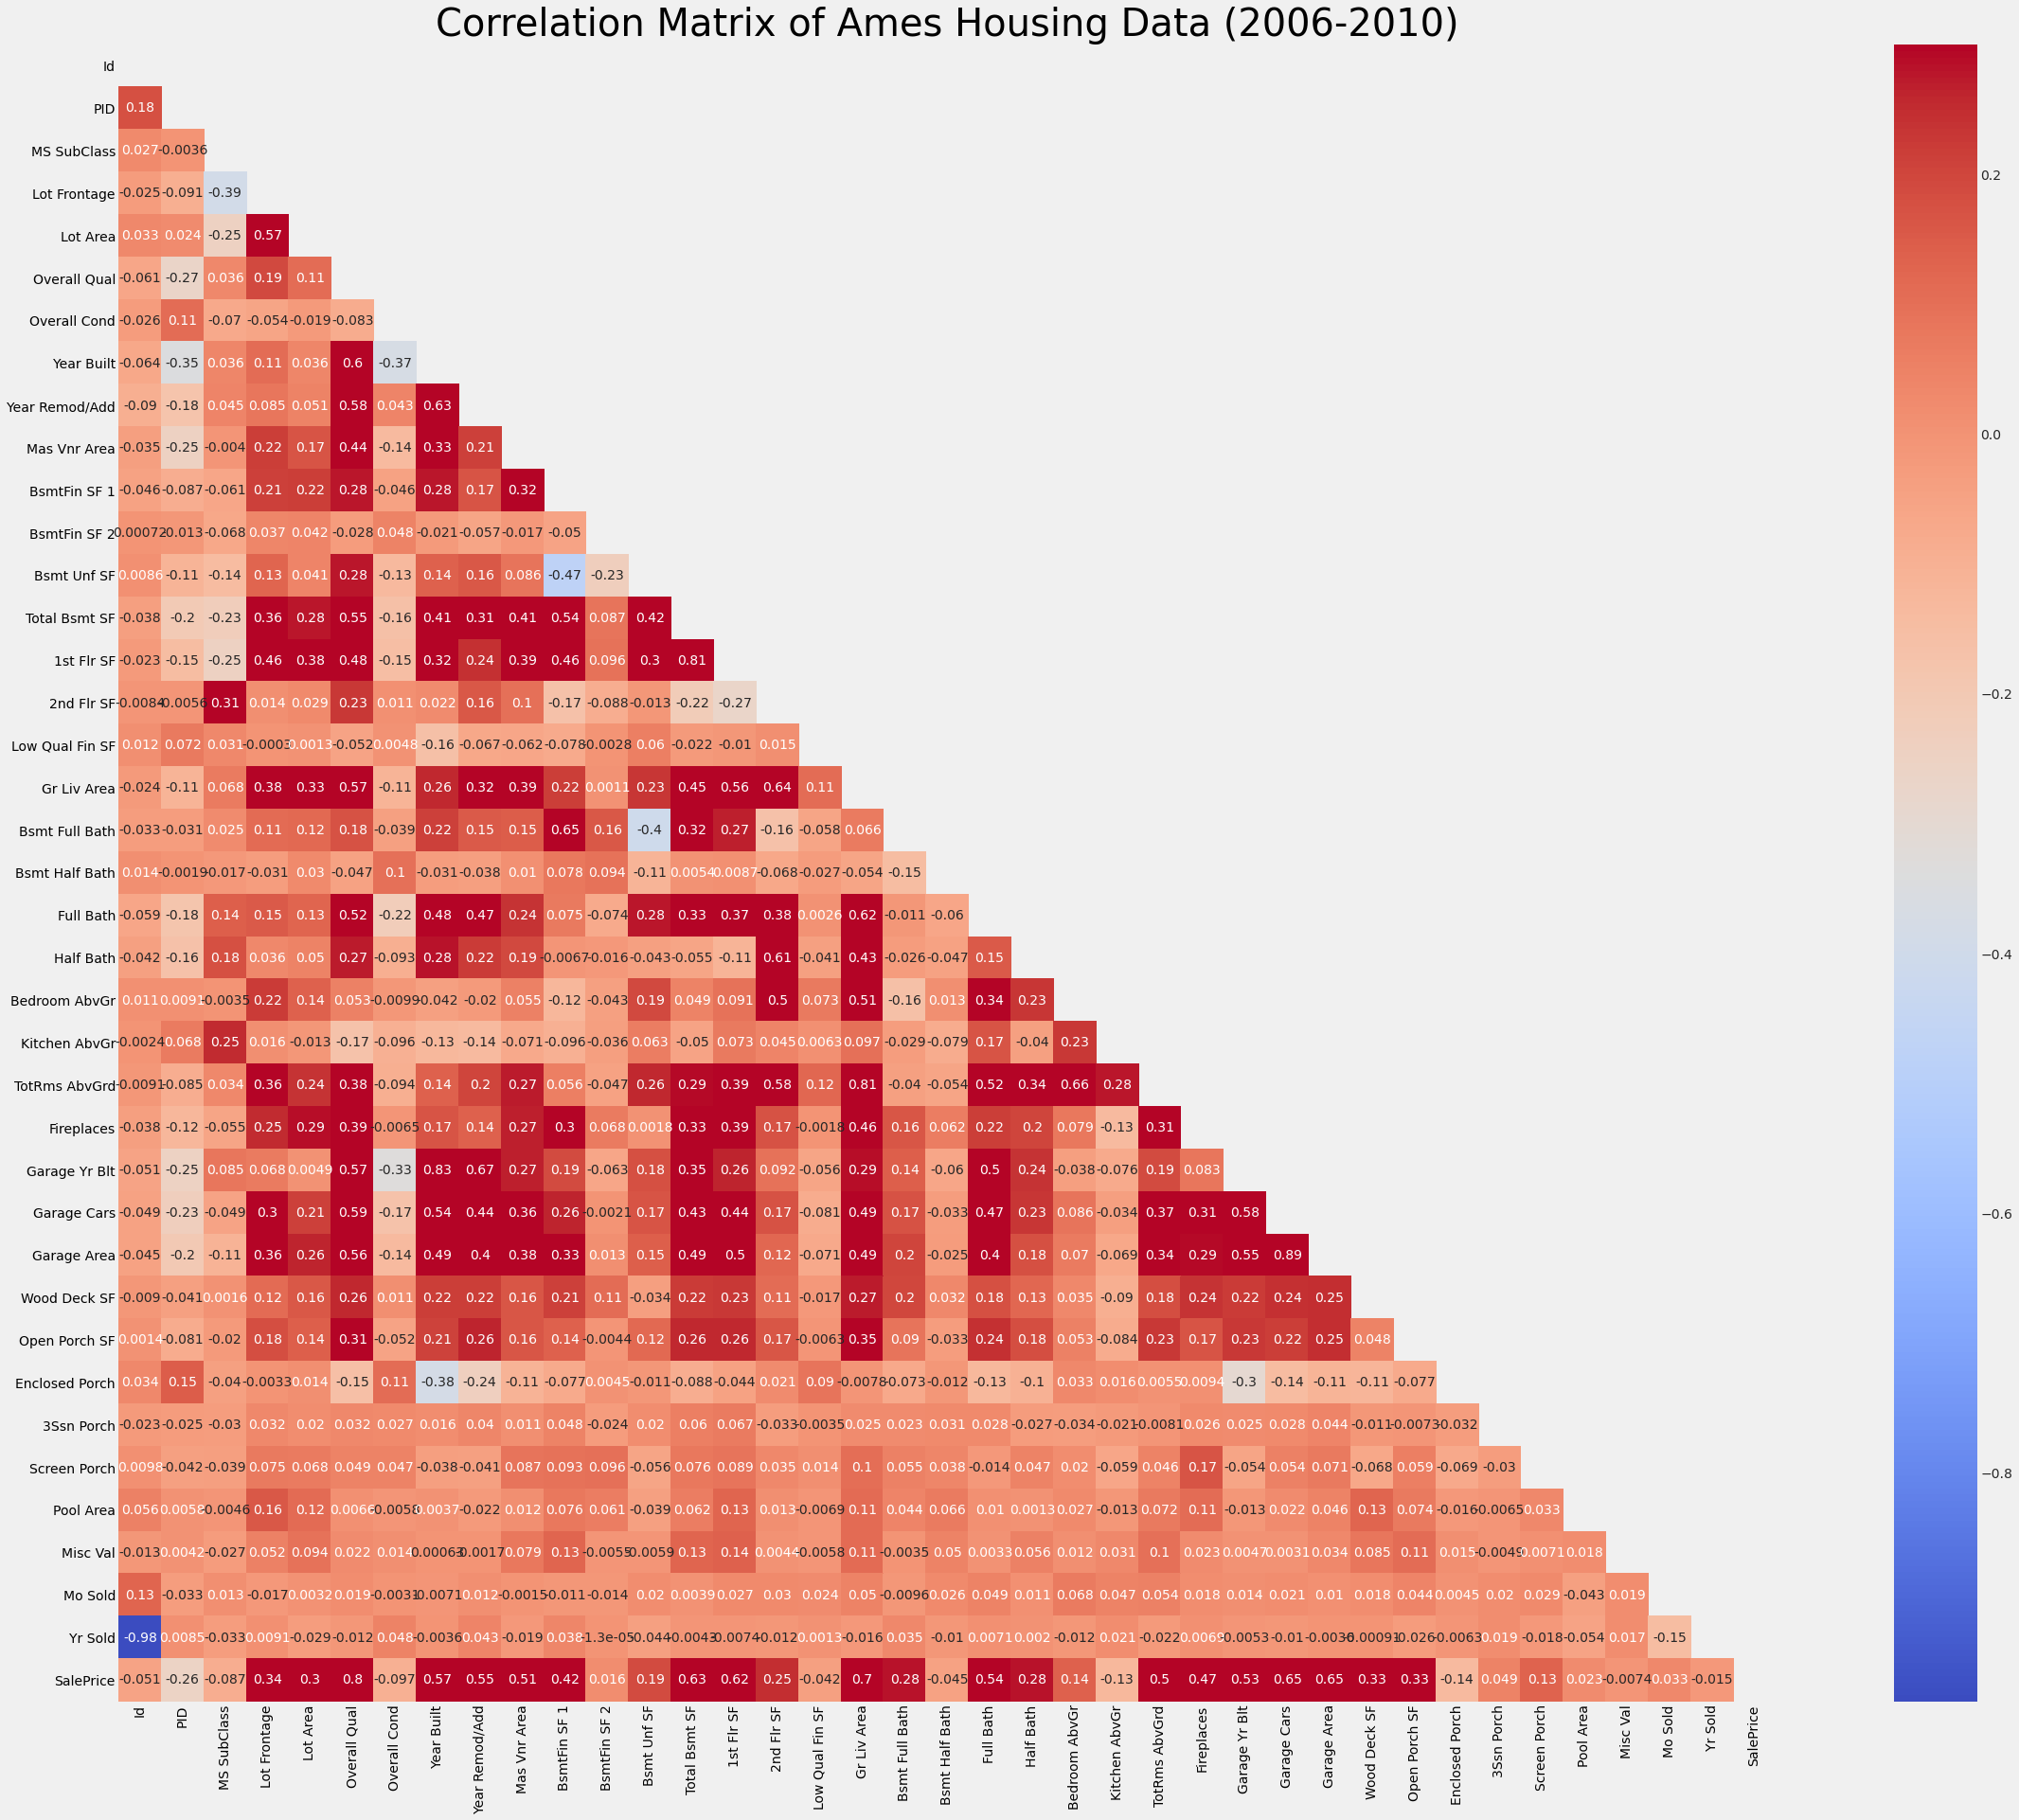

In [13]:
#here we can take a look at the correlation matrix of the numerical vairables
# Establish size of figure.
plt.figure(figsize=(40,30))
plt.title('Correlation Matrix of Ames Housing Data (2006-2010)',size=40)

corr = train_original.corr()

# Set up mask to be "True" in the upper triangle. (triu)
#use (tril) for lower triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=0.3, square=True, annot=True, cmap='coolwarm')

In [14]:
#here we can have a better idea of the correlation of the numbberical variables
pd.DataFrame(ames_train.corr()['saleprice'].sort_values(ascending=False))

saleprice
saleprice          1.000000
overall_qual       0.797167
gr_liv_area        0.695210
garage_area        0.647948
garage_cars        0.644690
total_bsmt_sf      0.625467
1st_flr_sf         0.615187
year_built         0.564247
garage_yr_blt      0.544798
year_remod/add     0.543813
full_bath          0.533039
totrms_abvgrd      0.502059
mas_vnr_area       0.501664
fireplaces         0.465318
nbhd_NridgHt       0.449709
bsmtfin_sf_1       0.419904
open_porch_sf      0.347060
fireplace_qu_nom   0.339427
wood_deck_sf       0.322466
lot_area           0.298239
lot_frontage       0.292695
bsmt_full_bath     0.278435
half_bath          0.277614
nbhd_NoRidge       0.263870
nbhd_StoneBr       0.257615
c_aircon           0.256367
2nd_flr_sf         0.247098
garage             0.220347
bsmt_unf_sf        0.190070
garage_cond_nom    0.165311
two_stories        0.153977
nbhd_Somerst       0.148095
garage_qual_nom    0.138632
screen_porch       0.132086
bedroom_abvgr      0.128726
nbhd_Timber        0.115460
nbhd_Veenker       0.082763
nbhd_CollgCr       0.079003
nbhd_Crawfor       0.056431
nbhd_ClearCr       0.051468
3ssn_porch         0.049182
bsmt_cond_nom      0.041212
nbhd_GrnHill       0.038802
mo_sold            0.038605
nbhd_NWAmes        0.032465
yr_sold_2007       0.024646
pool_area          0.022482
nbhd_Gilbert       0.020950
nbhd_SawyerW       0.014070
bsmtfin_sf_2       0.012726
yr_sold_2009       0.008930
nbhd_Greens        0.003000
yr_sold_2008      -0.001466
misc_val          -0.008568
nbhd_Landmrk      -0.012807
yr_sold           -0.012965
ns_rail_dum       -0.016876
exter_cond_nom    -0.023378
nbhd_Blueste      -0.026187
yr_sold_2010      -0.029497
low_qual_fin_sf   -0.038276
nbhd_Mitchel      -0.038635
nbhd_NPkVill      -0.048963
bsmt_half_bath    -0.049089
id                -0.051292
ew_rail_dum       -0.055499
nbhd_SWISU        -0.076600
ms_subclass       -0.091282
nbhd_BrDale       -0.097502
feedr             -0.106350
overall_cond      -0.107439
nbhd_MeadowV      -0.114072
enclosed_porch    -0.124983
kitchen_abvgr     -0.126814
artery_dum        -0.128743
nbhd_Sawyer       -0.138185
nbhd_BrkSide      -0.138708
nbhd_IDOTRR       -0.142807
nbhd_Edwards      -0.181505
nbhd_NAmes        -0.196982
nbhd_OldTown      -0.214355
heatingqc_nom     -0.452771
bsmt_qual_nom     -0.506139
age               -0.564282
kitchen_qual_nom  -0.690681
exter_qual_nom    -0.710645

Here are some of the features with the highest corr to saleprice:
- overall_qual
- gr_liv_area
- garage_area

These features might tell us which to create polynomial features for, to capture non-linear relationships in the data



These features are highly correlated:
- lot area and lot frontage
- garage_yyr_built and year_built
- 1st_flr_sf and total_bsmt_sf
- garage cars and garage area

Based on the high correlation between these variables, we will likely drop some of them so as to avoid multicolinearity

#### Identifying variables for the features matrix 
First, we check for variable with the strongest correlation to sale prices

Naturally, we would expect property size variables to be the most strongly correlated. Following that, we will be having a closer look at location variables, condition variables and lastly, amenities. 

#### List of potential numerical variables
1. overall_qual (amenities)
2. gr_liv_area (property size)
3. total_bsmt_sf (amenities, property size)
4. garage_area (amenities, property size)
5. year_built (condition)
6. full_bath (amenities)
7. mas_vnr_area (amenities)
8. totrms_abvgrd (property size, amnenities)
9. fireplace_qu_Gd (amenities
10. lot_area (property size)
11. year_remod/add (condition)

but first let's take a look at the highest correlated variables to saleprice

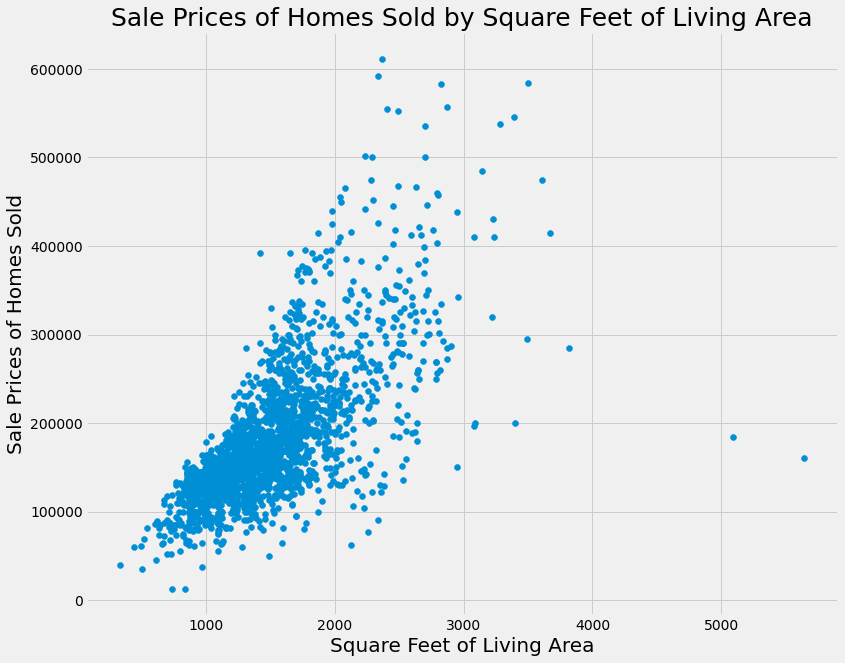

In [15]:
#since gr_liv_area has a strong correlation with saleprice, let's take a look at it in a scatter plot
plt.figure(figsize=(12,10))
plt.scatter(ames_train['gr_liv_area'],ames_train['saleprice'])

plt.title('Sale Prices of Homes Sold by Square Feet of Living Area',fontsize=25)
plt.ylabel('Sale Prices of Homes Sold',fontsize=20)
plt.xlabel('Square Feet of Living Area',fontsize=20);

##### Observations
There is a strong correlation between the sale prices and the square feet of living area. We will definitely be including this in our model. 

Here we can see that there are 2 houses with extremely huge living areas being sold at abonormally low prices. 
There are likely outliers. let's confirm with a boxplot. 

4003.170278206835

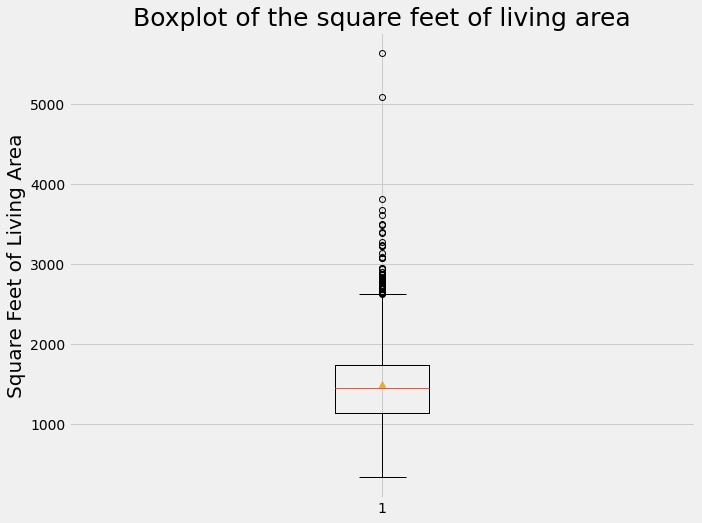

In [16]:
plt.figure(figsize=(10,8))

plt.boxplot(ames_train['gr_liv_area'],showmeans=True)
plt.title('Boxplot of the square feet of living area',fontsize=25)
plt.ylabel('Square Feet of Living Area',fontsize=20);

#to further confirm, we will calculate the number of std away from the mean
ames_train['gr_liv_area'].mean()+5*ames_train['gr_liv_area'].std()

#since the outliers are more than 5std away from the mean, 
#we will remove them from the dataset
# I know that outliers are by definition 3sd from the mean but i am erring on the safe side
#not dropping too many rows

In [17]:
#drop the outliers
ames_train.drop(list(ames_train[ames_train['gr_liv_area']>4000].index),inplace=True)

In [18]:
#confirm changes
ames_train.shape

(2028, 123)

count    2022.000000
mean     1497.201286
std       482.865703
min       334.000000
25%      1134.000000
50%      1449.000000
75%      1728.000000
max      3820.000000
Name: gr_liv_area, dtype: float64

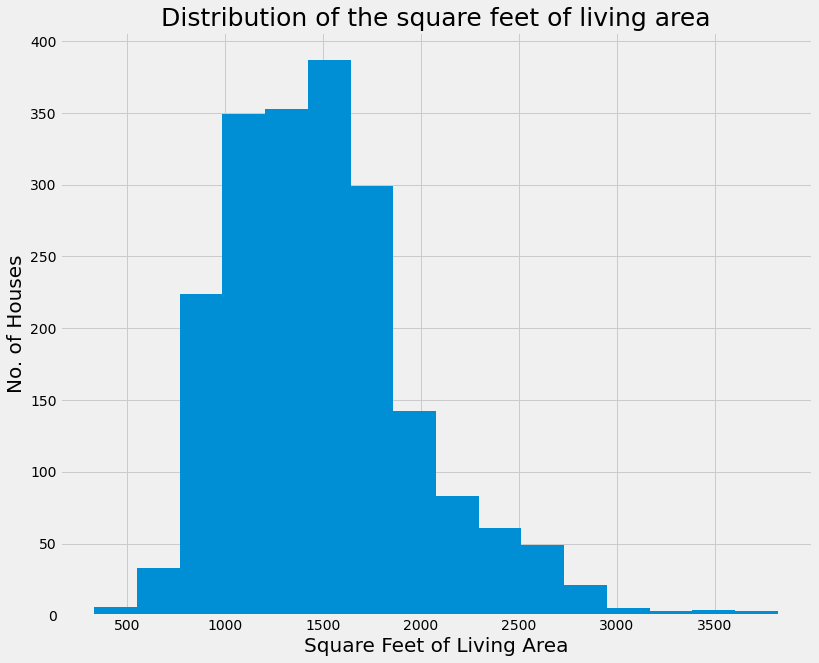

In [42]:
#from the boxplot, the distribution seems to look normal with a right skew
#let's take look at the histogram
plt.figure(figsize=(12,10))
plt.hist(ames_train['gr_liv_area'],bins=16)
plt.title('Distribution of the square feet of living area',fontsize=25)
plt.xlabel('Square Feet of Living Area',fontsize=20)
plt.ylabel('No. of Houses',fontsize=20);


ames_train['gr_liv_area'].describe()

##### Observations of distribution:
Here we can see somewhat of a normal distribution which is skew to the right, as seen by the long tail. The mean is also more than the median further supports my observations. The range is about 3486sqft. 

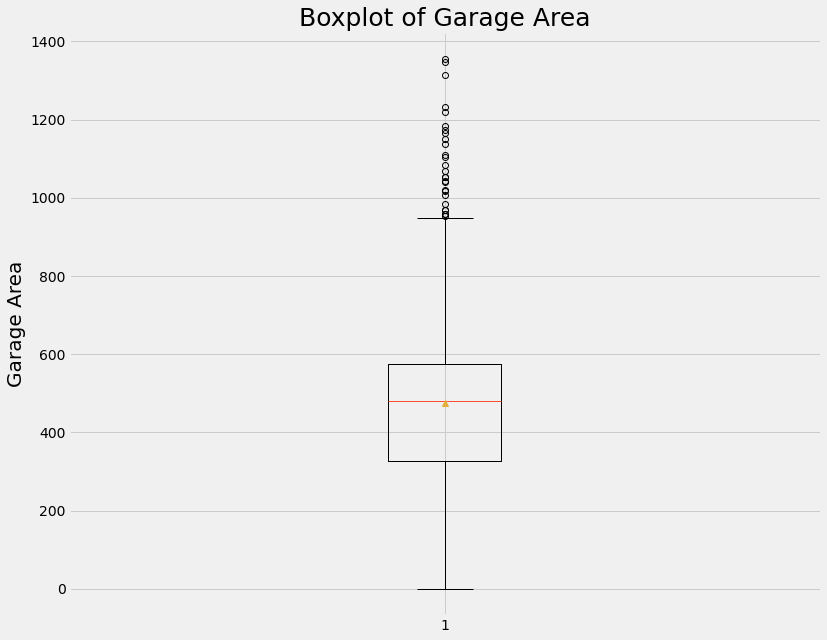

In [20]:
#next we look at garage area
plt.figure(figsize=(12,10))
plt.boxplot(ames_train['garage_area'],showmeans=True)

plt.title('Boxplot of Garage Area',fontsize=25)
plt.ylabel('Garage Area',fontsize=20);

In [21]:
#Looks like there are some outliers here 
#to further confirm, we will calculate the number of std away from the mean
ames_train['garage_area'].mean()+4*ames_train['garage_area'].std()

1327.242714879413

In [22]:
#we remove all values above 1317 aka 4sd from mean
ames_train.drop(list(ames_train[ames_train['garage_area']>1327].index),inplace=True)

In [23]:
ames_train.shape

(2026, 123)

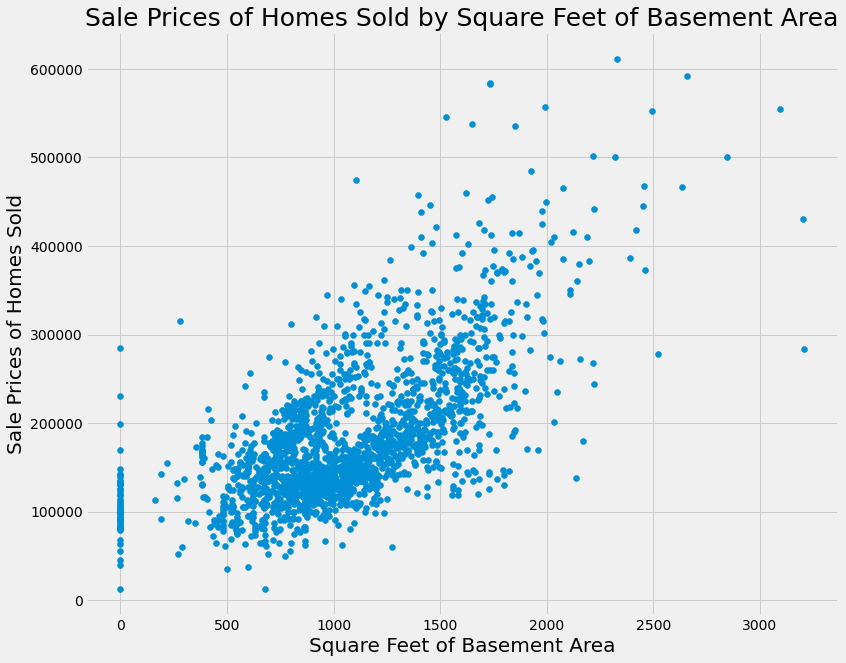

In [24]:
#next we look at total_bsmt_sf against sale prices 
plt.figure(figsize=(12,10))
plt.scatter(ames_train['total_bsmt_sf'],ames_train['saleprice'])

plt.title('Sale Prices of Homes Sold by Square Feet of Basement Area',fontsize=25)
plt.ylabel('Sale Prices of Homes Sold',fontsize=20)
plt.xlabel('Square Feet of Basement Area',fontsize=20);

##### Observation:
There is a strong correlation between the size of basement area and the sale prices which suggest that home buyers are willing to pay for houses with large basements. 
There are also some outlier as seen pass the 3000sqft mark. Lastly, we also observe that general houses with no basements (sqft=0) are priced much lower

In [25]:
# again, there are some outlier which we will remove
ames_train['total_bsmt_sf'].mean()+4*ames_train['total_bsmt_sf'].std()
ames_train.drop(list(ames_train[ames_train['total_bsmt_sf']>2733].index),inplace=True)

In [26]:
ames_train.shape

(2022, 123)

#### Categorical Variables

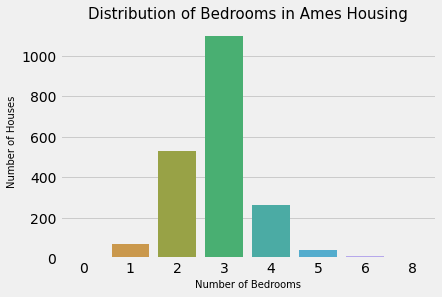

In [27]:
#next we look at the number of bedrooms
sns.countplot(ames_train['bedroom_abvgr'])

plt.title('Distribution of Bedrooms in Ames Housing',fontsize=15)
plt.ylabel('Number of Houses',fontsize=10)
plt.xlabel('Number of Bedrooms',fontsize=10);

##### Oberservations: 
Majority of houses have 3 bedrooms (mode)

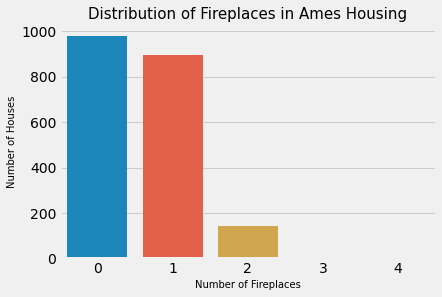

In [28]:
#other amenities in the house include the fireplace
sns.countplot(ames_train['fireplaces'])

plt.title('Distribution of Fireplaces in Ames Housing',fontsize=15)
plt.ylabel('Number of Houses',fontsize=10)
plt.xlabel('Number of Fireplaces',fontsize=10);

##### Observation on Fireplaces
Home buyers seem to be divided on the need of a fireplace.

#### Categorical variables

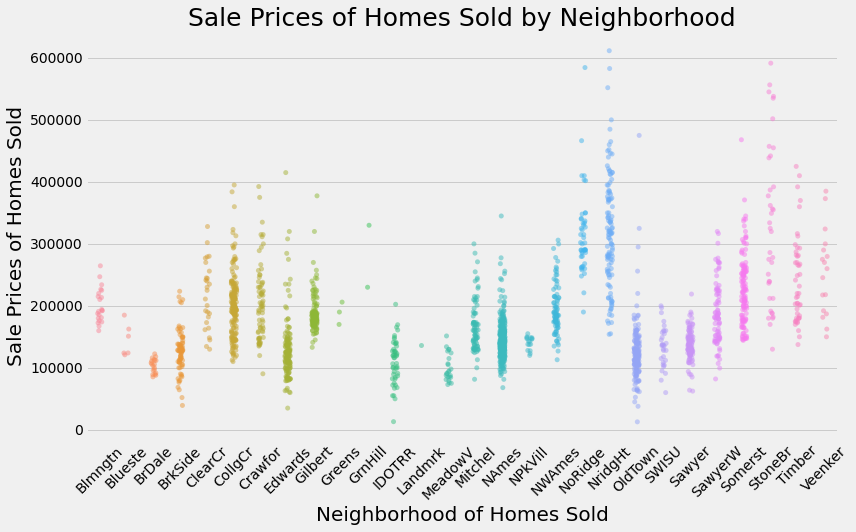

In [29]:
#next we look at a location variable
plt.figure(figsize=(12,7))
sns.stripplot(x = ames_train['neighborhood'], y = ames_train['saleprice'],
              order = np.sort(ames_train['neighborhood'].unique()),
              jitter=0.1, alpha=0.5)

plt.title('Sale Prices of Homes Sold by Neighborhood',fontsize=25)
plt.ylabel('Sale Prices of Homes Sold',fontsize=20)
plt.xlabel('Neighborhood of Homes Sold',fontsize=20)
plt.xticks(rotation=45);

##### Observations:
Here we can see that the less preferred neighborhoods are in the middle while the ones on the right seems to be expensive and few

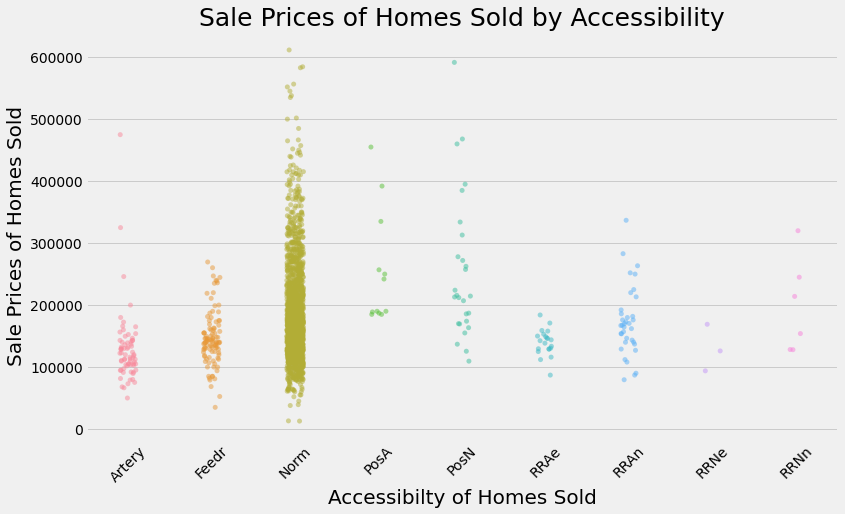

In [30]:
plt.figure(figsize=(12,7))
sns.stripplot(x =ames_train['condition_1'], y =ames_train['saleprice'],
              order = np.sort(ames_train['condition_1'].unique()),
              jitter=0.1, alpha=0.5)

plt.title('Sale Prices of Homes Sold by Accessibility',fontsize=25)
plt.ylabel('Sale Prices of Homes Sold',fontsize=20)
plt.xlabel('Accessibilty of Homes Sold',fontsize=20)
plt.xticks(rotation=45);

##### Observations
Seems like proximity to major roads and highways does not seem affect home buyers

#### Time variables

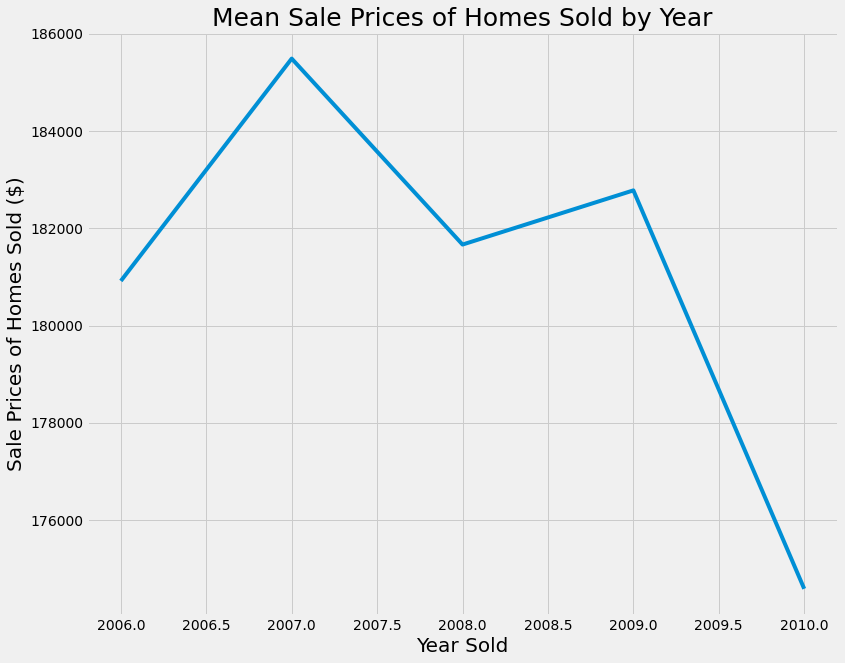

In [31]:
#given that the sales years includes the subprime financial crisis, there will probably be an impact
#on sale prices
saleprice_yr=ames_train.groupby('yr_sold')['saleprice'].mean()

plt.figure(figsize=(12,10))
plt.plot(saleprice_yr)

plt.title('Mean Sale Prices of Homes Sold by Year',fontsize=25)
plt.ylabel('Sale Prices of Homes Sold ($)',fontsize=20)
plt.xlabel('Year Sold',fontsize=20,);

##### Observation:
Here we can see that sale prices has been falling since 2007 

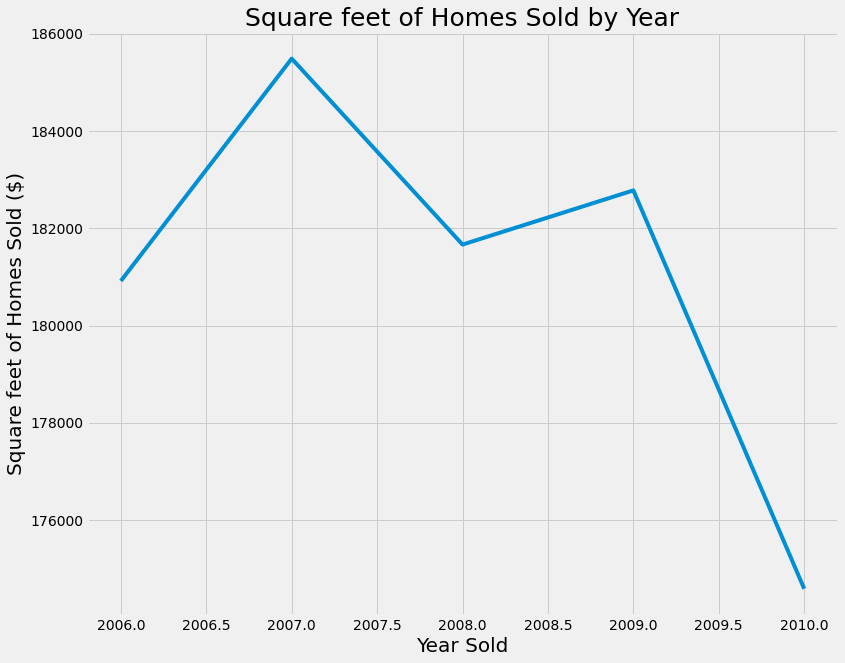

In [32]:
saleprice_sqft=ames_train.groupby('yr_sold')['gr_liv_area'].mean()

plt.figure(figsize=(12,10))
plt.plot(saleprice_yr)

plt.title('Square feet of Homes Sold by Year',fontsize=25)
plt.ylabel('Square feet of Homes Sold ($)',fontsize=20)
plt.xlabel('Year Sold',fontsize=20,);

##### Observation:
Similarly,here we can see that home owners have been choosing to buy smaller houses since 2007

#### Summary Statistics

In [33]:
ames_train.describe().T

count           mean           std           min  \
id                2022.0    1473.044510    842.249380      1.000000   
ms_subclass       2022.0      57.069733     42.719371     20.000000   
lot_frontage      2022.0      69.073634     35.920400      9.812061   
lot_area          2022.0   10016.561325   6622.165137   1300.000000   
overall_qual      2022.0       6.126607      1.401136      1.000000   
overall_cond      2022.0       5.568744      1.097869      1.000000   
year_built        2022.0    1972.120178     29.833795   1872.000000   
year_remod/add    2022.0    1984.365974     20.915551   1950.000000   
mas_vnr_area      2022.0      97.907517    170.973745      0.000000   
bsmtfin_sf_1      2022.0     437.630564    436.907141      0.000000   
bsmtfin_sf_2      2022.0      48.119683    165.413525      0.000000   
bsmt_unf_sf       2022.0     567.088526    444.185359      0.000000   
total_bsmt_sf     2022.0    1052.838773    415.448441      0.000000   
1st_flr_sf        2022.0    1160.719090    373.337607    334.000000   
2nd_flr_sf        2022.0     331.143917    426.784095      0.000000   
low_qual_fin_sf   2022.0       5.338279     50.175371      0.000000   
gr_liv_area       2022.0    1497.201286    482.865703    334.000000   
bsmt_full_bath    2022.0       0.427794      0.522127      0.000000   
bsmt_half_bath    2022.0       0.063798      0.252420      0.000000   
full_bath         2022.0       1.580613      0.547750      0.000000   
half_bath         2022.0       0.374382      0.502144      0.000000   
bedroom_abvgr     2022.0       2.848665      0.826243      0.000000   
kitchen_abvgr     2022.0       1.042532      0.209074      0.000000   
totrms_abvgrd     2022.0       6.431256      1.540472      2.000000   
fireplaces        2022.0       0.592483      0.634723      0.000000   
garage_yr_blt     2022.0    1977.028190     26.747369   1872.000000   
garage_cars       2022.0       1.782394      0.755731      0.000000   
garage_area       2022.0     473.897132    210.981649      0.000000   
wood_deck_sf      2022.0      94.077646    128.382798      0.000000   
open_porch_sf     2022.0      47.089515     64.632876      0.000000   
enclosed_porch    2022.0      21.841246     59.081356      0.000000   
3ssn_porch        2022.0       2.586053     25.340321      0.000000   
screen_porch      2022.0      16.538081     57.407243      0.000000   
pool_area         2022.0       2.194857     36.537911      0.000000   
misc_val          2022.0      43.879822    437.345965      0.000000   
mo_sold           2022.0       6.212661      2.740153      1.000000   
yr_sold           2022.0    2007.773492      1.310382   2006.000000   
saleprice         2022.0  181873.277448  77818.404066  12789.000000   
nbhd_Blueste      2022.0       0.002967      0.054406      0.000000   
nbhd_BrDale       2022.0       0.009397      0.096504      0.000000   
nbhd_BrkSide      2022.0       0.037587      0.190241      0.000000   
nbhd_ClearCr      2022.0       0.013353      0.114810      0.000000   
nbhd_CollgCr      2022.0       0.088526      0.284129      0.000000   
nbhd_Crawfor      2022.0       0.035114      0.184113      0.000000   
nbhd_Edwards      2022.0       0.069733      0.254759      0.000000   
nbhd_Gilbert      2022.0       0.057369      0.232604      0.000000   
nbhd_Greens       2022.0       0.001484      0.038499      0.000000   
nbhd_GrnHill      2022.0       0.000989      0.031442      0.000000   
nbhd_IDOTRR       2022.0       0.023739      0.152272      0.000000   
nbhd_Landmrk      2022.0       0.000495      0.022239      0.000000   
nbhd_MeadowV      2022.0       0.011869      0.108325      0.000000   
nbhd_Mitchel      2022.0       0.040059      0.196147      0.000000   
nbhd_NAmes        2022.0       0.153314      0.360379      0.000000   
nbhd_NPkVill      2022.0       0.008408      0.091329      0.000000   
nbhd_NWAmes       2022.0       0.043027      0.202967      0.000000   
nbhd_NoRidge      2022.0       0.023244    

Now that we have gone through the data and found/formed various variables that looks promising, we will move on to select the features based on our 4 qualities mentioned 
- Location
- Property Size
- Overall Condition
- Amenities

### Feature Selection

In [35]:
#see all columns for selection
columns=list(ames_train.columns)
columns

['id',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'lot_shape',
 'land_contour',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_con

In [36]:
#first we add all the variables that we created into a feature matrix
features=columns[columns.index('nbhd_Blueste'):]

In [37]:
#next we add in the highly correlated numerical variables, eliminating those with low correlations
features.extend(list(ames_train.corr()['saleprice'].sort_values(ascending=False).index)[:14])

In [38]:
#lastly, we see if there are any other variables we would like to add in
#we will include lot_area but not lot_frontage due to the high corr bwt the 2 variables
features.extend(['lot_area','bedroom_abvgr'])

In [39]:
#remove saleprice
#we will remove garage_yr_blt due to the high corr with year_built
#we will remove 1st_flr_sf due to the high corr with total_bsmt_sf
#we will remove garage_cars due to the high corr with garage_area
remove_lst=['saleprice','garage_yr_blt','1st_flr_sf','garage_cars']

for col in remove_lst:
    features.remove(col)

### Save Data to CSV

In [40]:
ames_train.shape

(2022, 123)

In [41]:
ames_train.to_csv('../datasets/train_clean_2.csv',index=False)

Now that we have explored and selected our features, let's move on to modeling and predicting housing prices. We will end off with some recommendations on the qualities to look out for in an investment

- [Preprocessing, Modeling and Recommendations](./book3_preprocesing_modeling_recommendations.ipynb)